In [1]:
### Plot the rates vs acidity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/TableIVData.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

df

,Acid,H0Acetic,H0inWater,H070%DMSO,1,3,4,5,6,9,10,11
0,4Percent,-2.38,0.20,0.06,2.53,2.64,7.88,19.5,26.4,14.7,153.0,4.64
1,5Percent,-2.46,0.09,-0.10,4.16,4.53,14.40,31.3,47.6,15.7,169.0,4.88
2,6Percent,-2.54,-0.02,-0.25,6.58,6.75,21.88,NaN,73.5,14.8,NaN,NaN


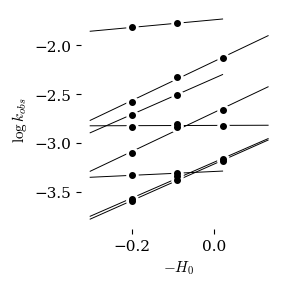

[('1', 1.886842601991535),
 ('3', 1.8531811180054254),
 ('4', 2.01600500078108),
 ('5', 1.8682702380357314),
 ('6', 2.021288237338016),
 ('9', 0.0133835483944613),
 ('10', 0.3926843072370415),
 ('11', 0.19910764952572552)]

In [2]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

columns = ["1","3","4","5","6","9","10","11"]

plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  



pairs = []

for c in columns:
#    x = -df["H070%DMSO"]     # Change these to select different H0 scales
    x = -df["H0inWater"]
#    x = -df["H0Acetic"]

    y = np.log10(df[c]/10000)
    
    if np.isnan(y[2]):       # remobe NaN from last data point in series "10" and "11"
        y = y[0:2]
        x = x[0:2]
    
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.01
    x_list = np.arange(np.min(x)-0.1, np.max(x)+0.1+step, step)
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    pairs.append((c,slope))     # record reactant and corresponding log-log plot slope (reaction order)

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\log{k_{obs}}$", 
           xlabel=r"$-H_0$",
    #          xlim=[0,13],                  
    #          ylim=[-2,3]
          
          )
    
    #ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/AcidPlots.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots
display(pairs)

In [3]:
### Run the code above and change the x-axis for each solvent system. Collect the values and enter them below.

# Order of reaction wrt H+

dictionary = {"Reactant": ["1",   "3",   "4",    "5",   "6",    "9",    "10",  "11"],
             "SumSigma": [.22,   .37,   .11,   .12,    0,    -0.78,   -0.62, -1.09],
             "H0Acetic":  [2.59, 2.55,   2.77, 2.57,    2.78,  0.02,   0.54,   0.27],
             "H0inWater": [1.89, 1.85,   2.01, 1.87,    2.02,  0.01,   0.39,   0.20],
             "H070_DMSO": [1.34, 1.31,   1.43, 1.28,    1.44,  0.01,   0.27,   0.13]}
df = pd.DataFrame.from_dict(dictionary)

df.sort_values(by=("SumSigma"), inplace=True)  
print(df)

  Reactant  SumSigma  H0Acetic  H0inWater  H070_DMSO
7       11     -1.09      0.27       0.20       0.13
5        9     -0.78      0.02       0.01       0.01
6       10     -0.62      0.54       0.39       0.27
4        6      0.00      2.78       2.02       1.44
2        4      0.11      2.77       2.01       1.43
3        5      0.12      2.57       1.87       1.28
0        1      0.22      2.59       1.89       1.34
1        3      0.37      2.55       1.85       1.31


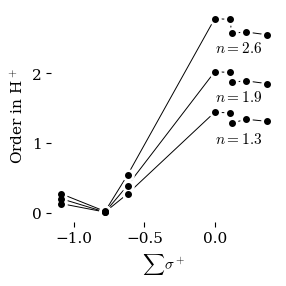

In [4]:
### Plot the isotope effect vs acidity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

x =  df["SumSigma"]

y1 = df["H0Acetic"]      # Using the dataframe from code above
y2 = df["H0inWater"]
y3 = df["H070_DMSO"]

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  

########################
### Plot the data    ###
########################

ax.scatter(x,y1, s=64, color="white", zorder=2)
ax.scatter(x,y1, s=16, color="black", zorder=3)
ax.plot(x,y1, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y2, s=64, color="white", zorder=2)
ax.scatter(x,y2, s=16, color="black", zorder=3)
ax.plot(x,y2, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y3, s=64, color="white", zorder=2)
ax.scatter(x,y3, s=16, color="black", zorder=3)
ax.plot(x,y3, color='black', zorder=1, linewidth=0.7)

ax.text(0, 1, r"$n=1.3$")  
ax.text(0, 1.6, r"$n=1.9$")  
ax.text(0, 2.3, r"$n=2.6$")  


############################
### Set labels and scale ###
############################

ax.set(ylabel=r"Order in H$^+$", 
       xlabel=r"$\sum \sigma^+$",
#          xlim=[0,13],                  
#          ylim=[-2,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/AcidPlots3.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots
